# 💳 Credit Card Fraud Detection Intuitions

#### What is Credit Card Fraud
Credit card fraud is when someone uses another person's credit card or account information to make unauthorized purchases or access funds through cash advances. Credit card fraud doesn’t just happen online; it happens in brick-and-mortar stores, too. As a business owner, you can avoid serious headaches – and unwanted publicity – by recognizing potentially fraudulent use of credit cards in your payment environment.

#### Problem Statement:
The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be a fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

#### Business questions to brainstorm:
Since all features are anonymous, we will focus our analysis on non-anonymized features: Time, Amount

 1. How different is the amount of money used in different transaction classes?
 2. Do fraudulent transactions occur more often during a certain frames?


#### Observations
1. Very few transactions are actually fraudulent (less than 1%). The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions.
2. The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.
3. The ‘Time’ and ‘Amount’ features are not transformed data.
4. There is no missing value in the dataset.

# The proposed Methodology for Credit Card Fraud Detection
There are three phases that mainly used namely: the pre-processing phase, the feature selection phase, and the modeling and evaluation phase.

## Notebook Imports

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,  cross_val_score, LeaveOneOut
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix



## Constants

In [102]:
CREDIT_CARD_DATA = '../Credit Card Data/creditcard.csv'

In [103]:
data = pd.read_csv(CREDIT_CARD_DATA)

In [104]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [105]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [106]:
data.shape

(284807, 31)

## 1. Exploratory Data Analysis

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [108]:
data.isnull().any().sum()

0

In [109]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [110]:
data['Amount'].tail()

284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, dtype: float64

In [111]:
data['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

The main variables to work with are:
1. Time
2. Amount
3. Class (1: fraud, 0: not_fraud)

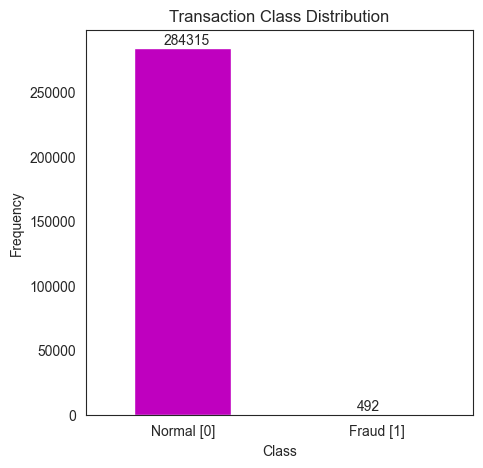

In [112]:
LABELS = ['Normal [0]', 'Fraud [1]']

count_class = pd.Series.value_counts(data['Class'], sort=True)

count_class.plot(kind='bar', color=['m', 'k'], figsize=(5, 5), rot=0)
plt.title('Transaction Class Distribution')
plt.xticks(range(len(LABELS)), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')

for i, v in enumerate(count_class):
    plt.text(i-0.1, v+3000, str(v))
    

### Distribution of different columns.

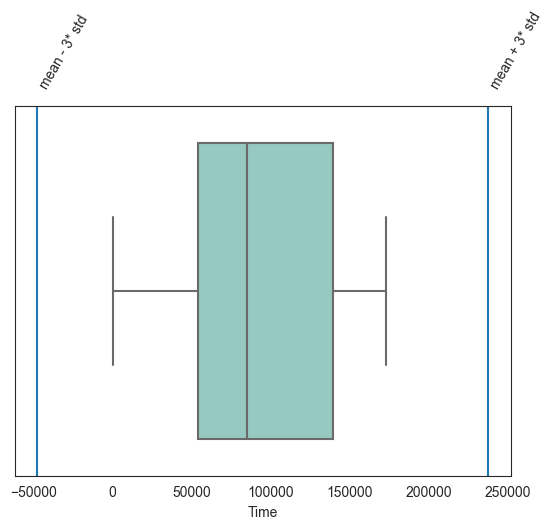

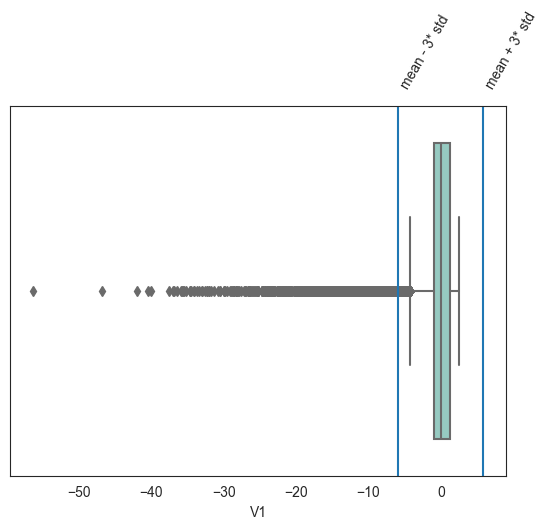

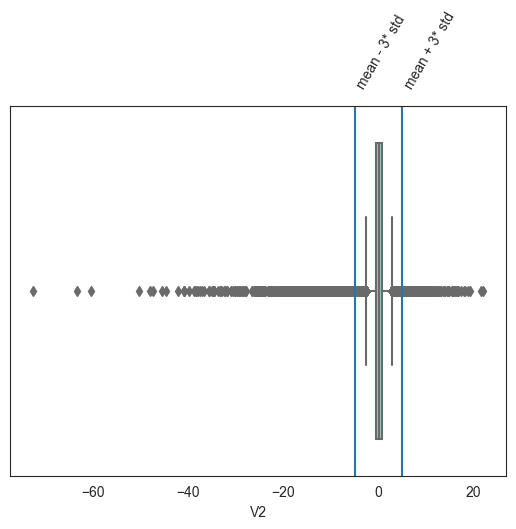

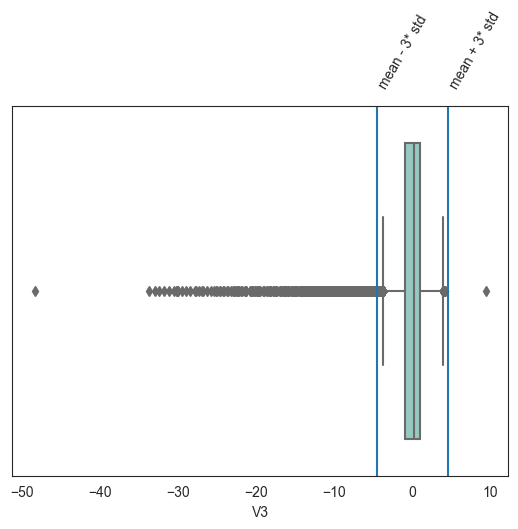

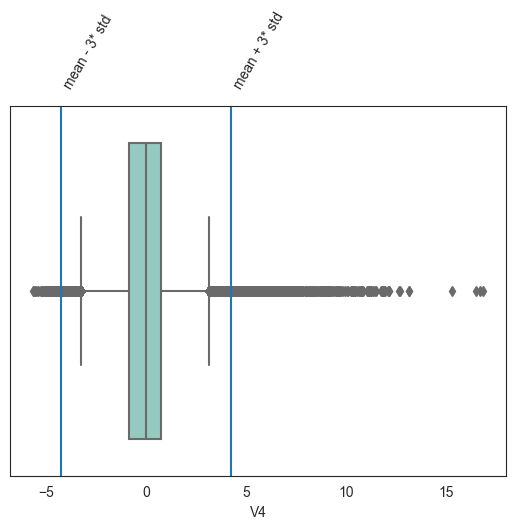

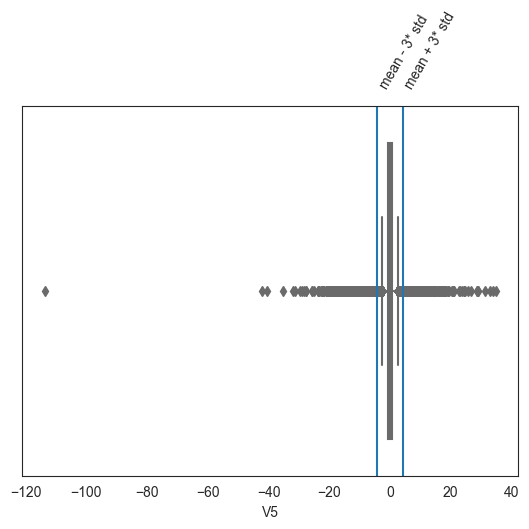

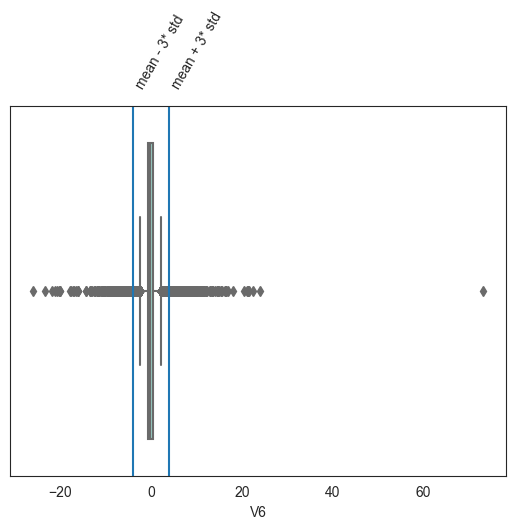

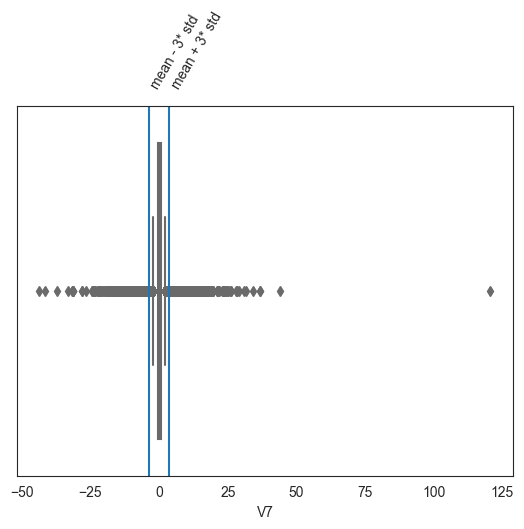

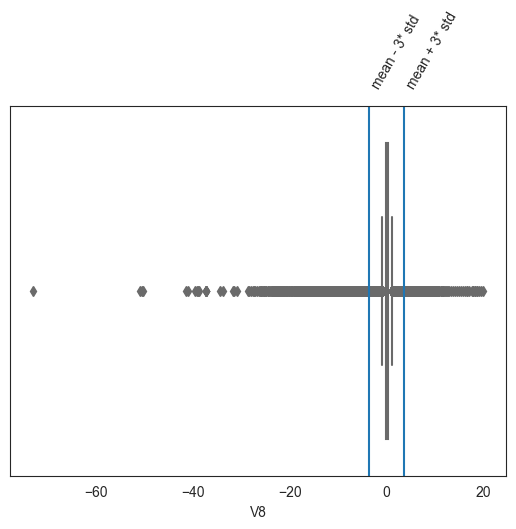

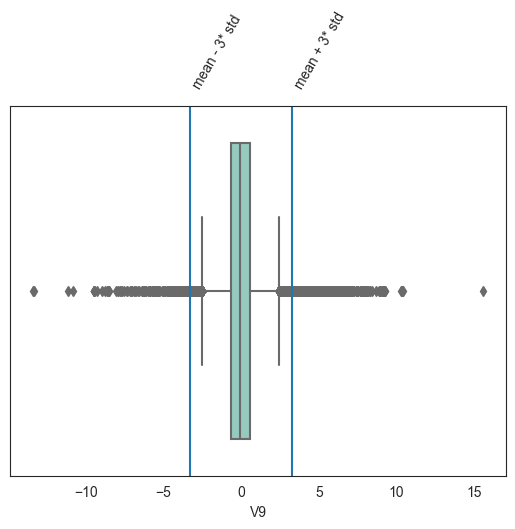

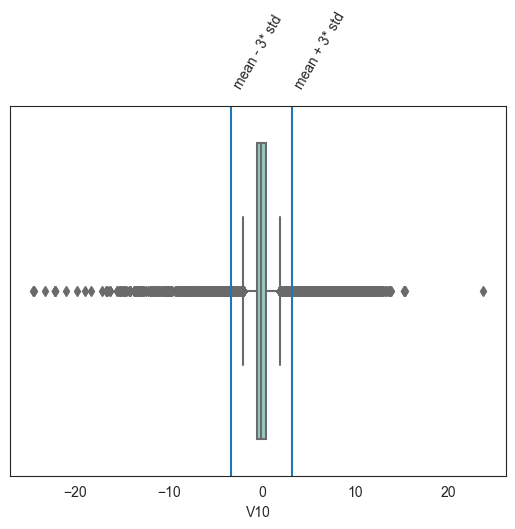

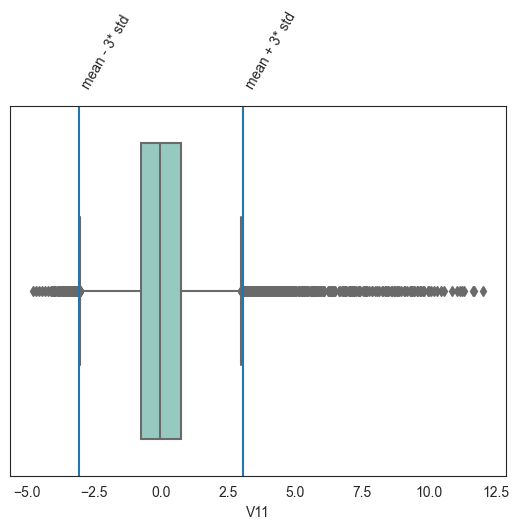

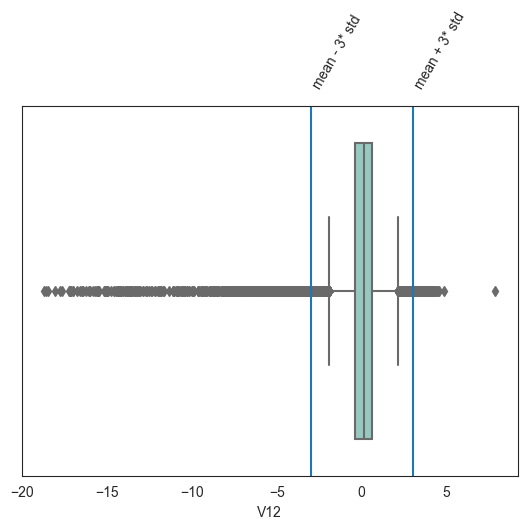

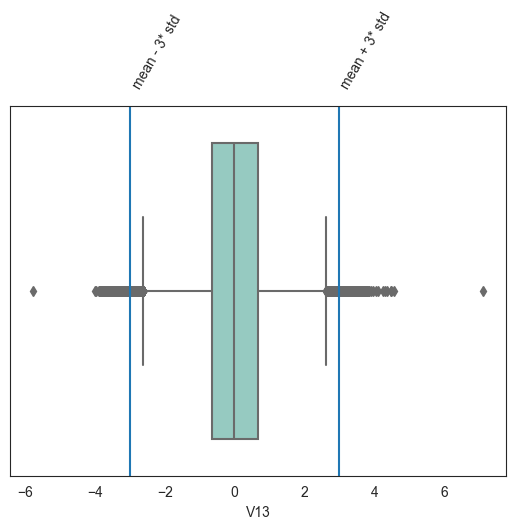

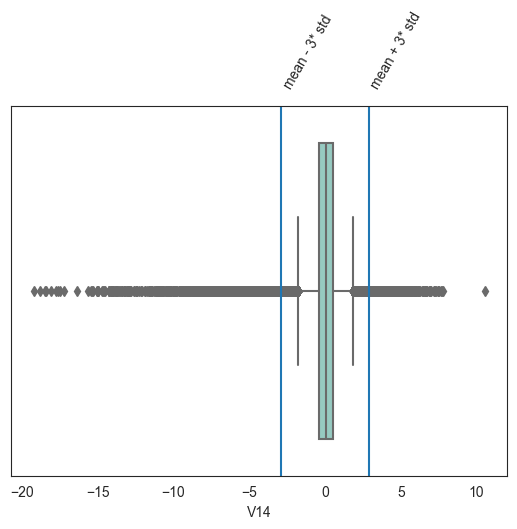

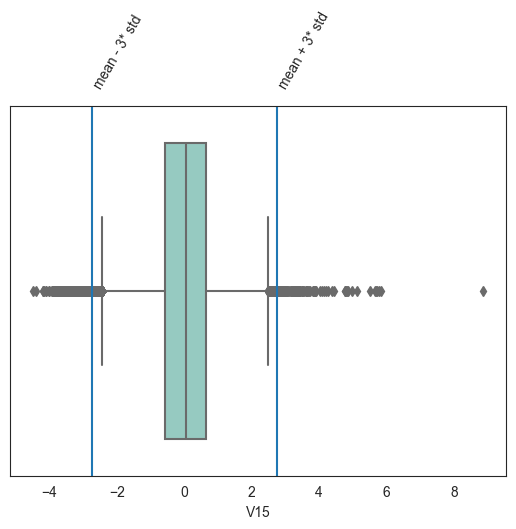

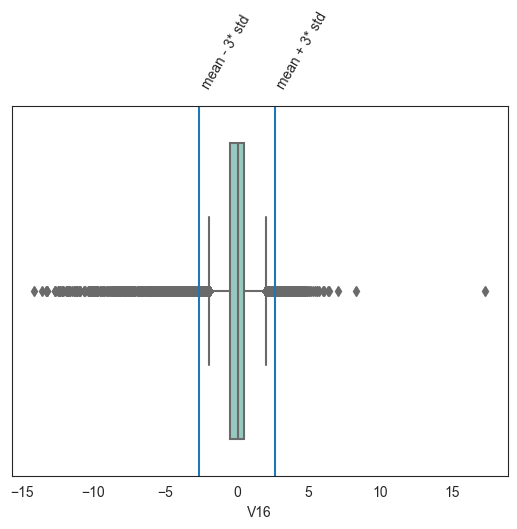

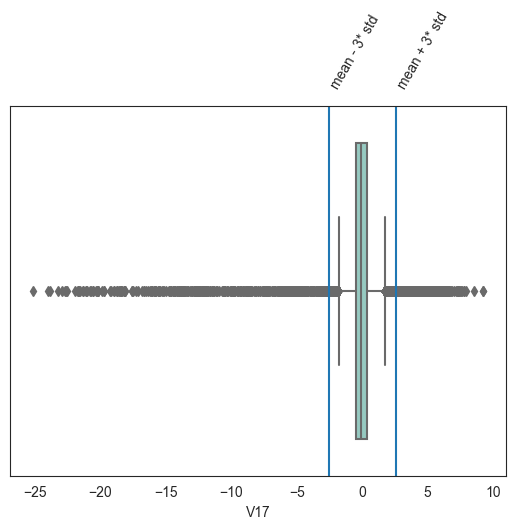

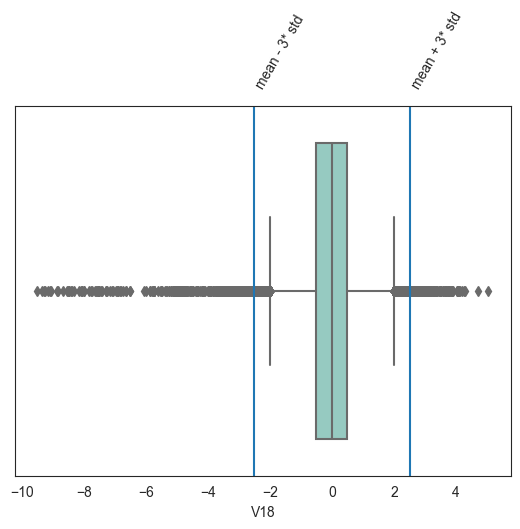

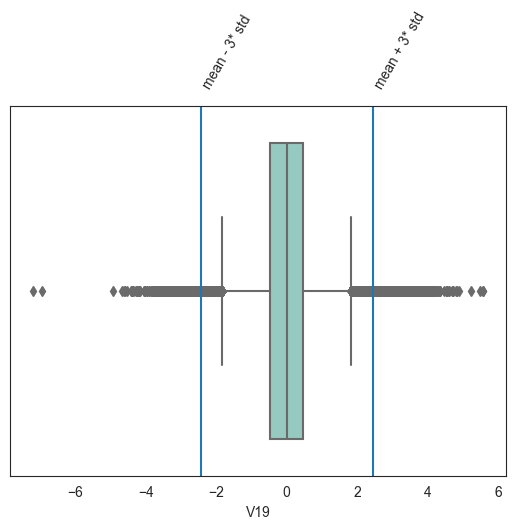

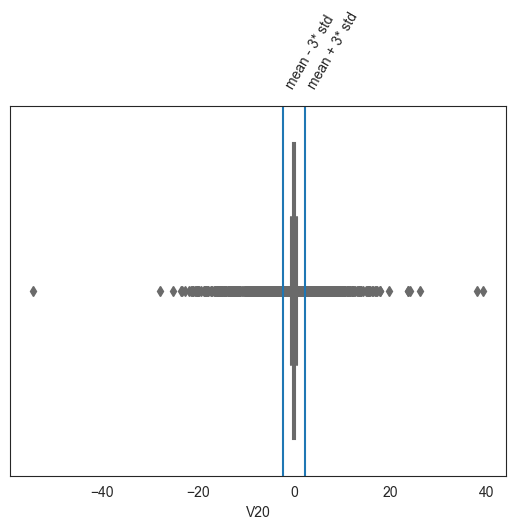

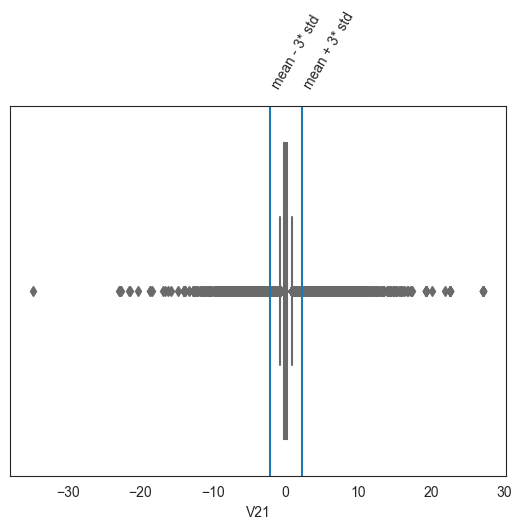

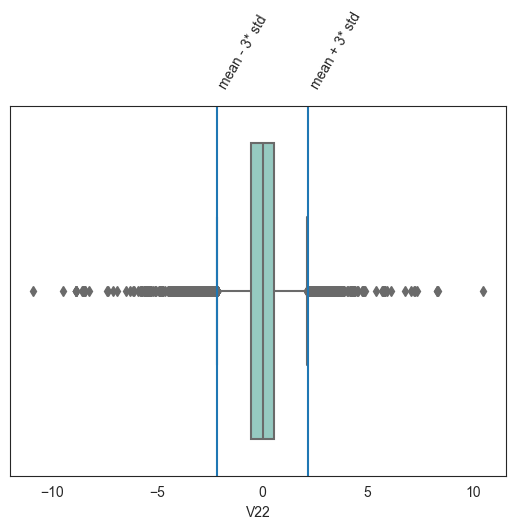

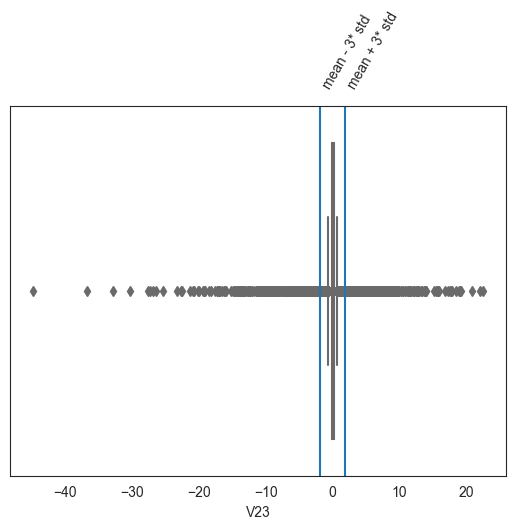

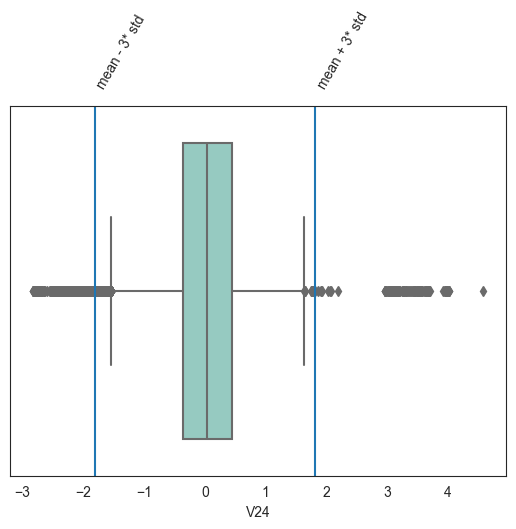

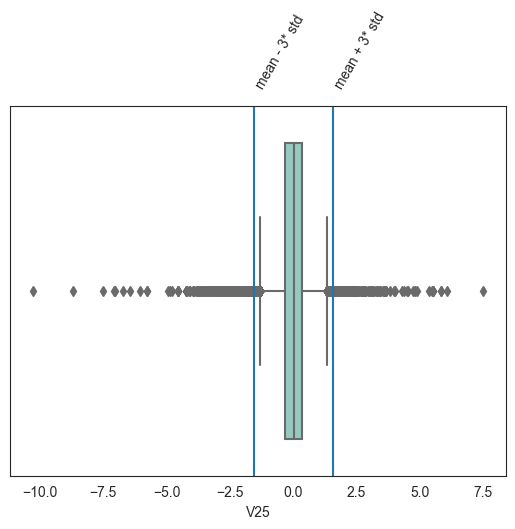

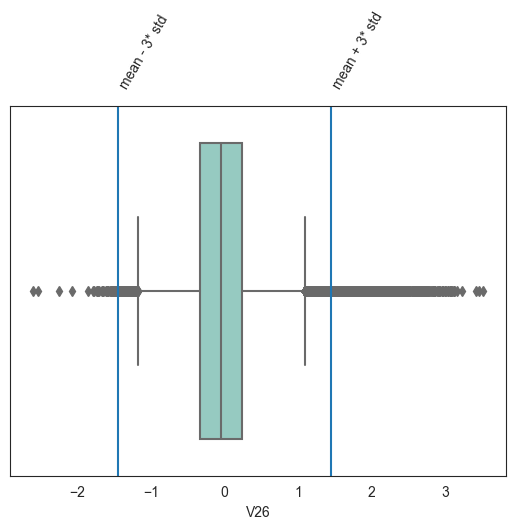

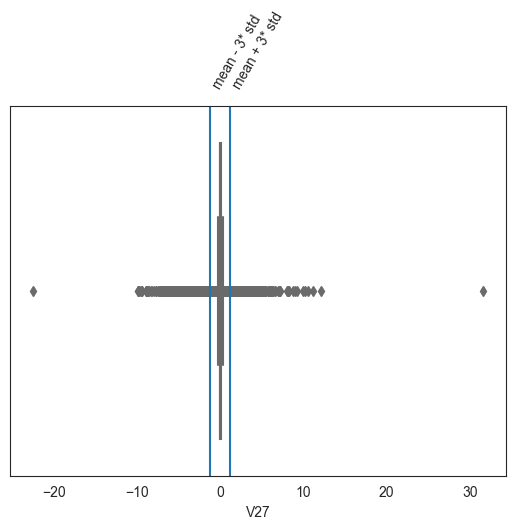

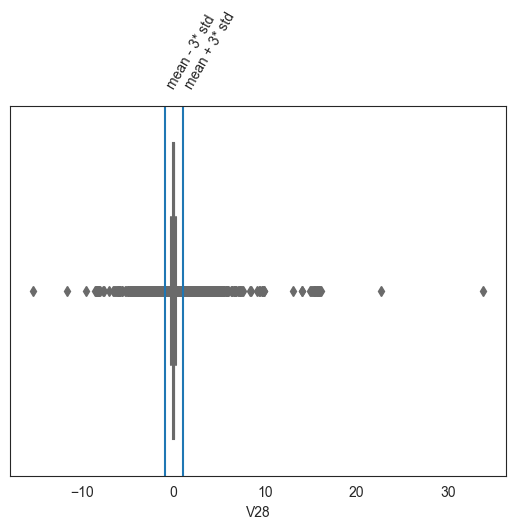

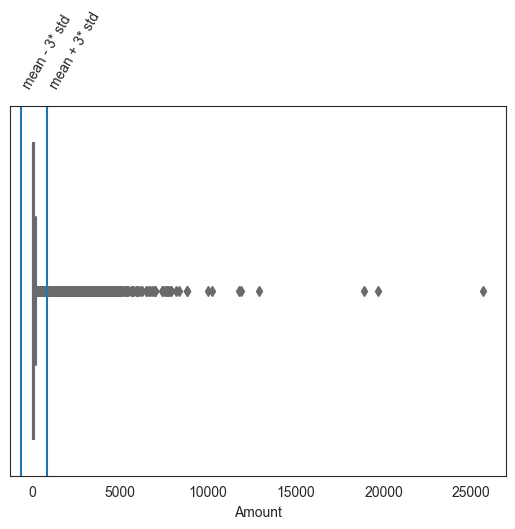

In [113]:
for var in data.columns[:-1]:
    
    sns.boxplot(data=data, hue=data['Class'],x=data[var], palette='Set3')
    mean = data[var].mean()
    std = data[var].std()
    plt.axvline(mean - 3 * std, 0, 1)
    plt.text(mean - 3 * std, -0.55, 'mean - 3* std', rotation=60)
    plt.axvline(mean + 3 * std, 0, 1)
    plt.text(mean + 3 * std, -0.55, 'mean + 3* std', rotation=60)
    

    plt.show()

From the above results we can conclude that there is imbalance in our dataset! Most of the transactions are not fraudulent, and if we use this dataFrame as the base of our predictive models and analysis we will get a lot of errors and this will result in overfitting of data. And also poor  generalization.

Finding the right hypothesis that matches the given resources (training data) in such
a way that there is a balance between the approximation and generalization trade-off
is the holy grail of machine learning.

Determine the number of fraud and valid transactions in the entire dataset.

In [16]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] ==0]

print(f"Fraudulent transitions: {fraud.shape}")
print(f"Non-Fraudulent transitions: {normal.shape}")

Fraudulent transitions: (492, 31)
Non-Fraudulent transitions: (284315, 31)


The different amount of money used in each transaction classes

In [17]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


How often does these fraudulent activities happens on particular time frame?

In [18]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.000000,284315.000000
mean,80746.806911,94838.202258
std,47835.365138,47484.015786
min,406.000000,0.000000
25%,41241.500000,54230.000000
50%,75568.500000,84711.000000
75%,128483.000000,139333.000000
max,170348.000000,172792.000000


In [19]:
fraud.Time.tail()

279863    169142.0
280143    169347.0
280149    169351.0
281144    169966.0
281674    170348.0
Name: Time, dtype: float64

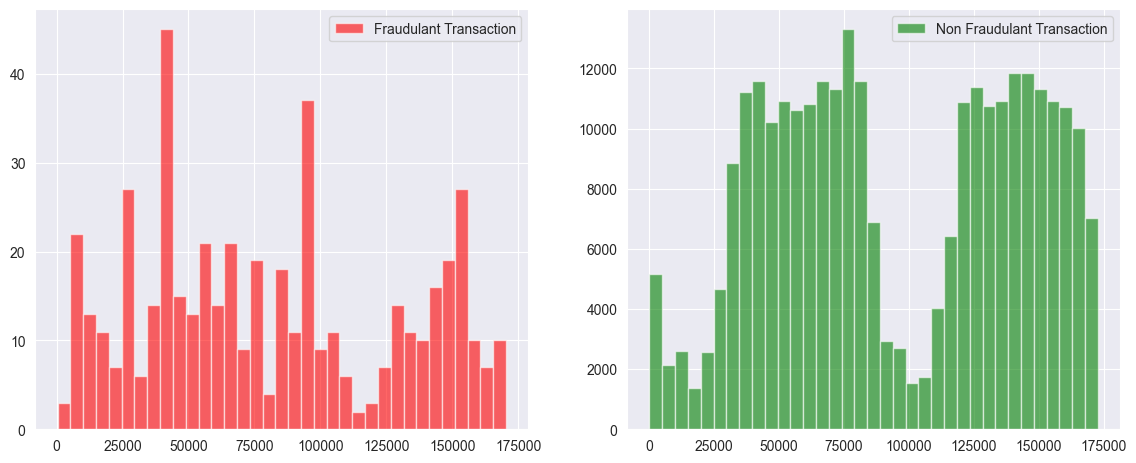

In [20]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='red', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='green', alpha=0.6,  label="Non Fraudulant Transaction")
plt.legend()

## Correlation

## $ \rho _{XY} = corr(XY)$
## $ -1.0 \leq \rho _{XY} \leq +1.0 $

In [21]:
data['Amount'].corr(data['Class'])

0.005631753006768527

In [22]:
data.corr() # Pearson Correlation Coefficients

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [23]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0

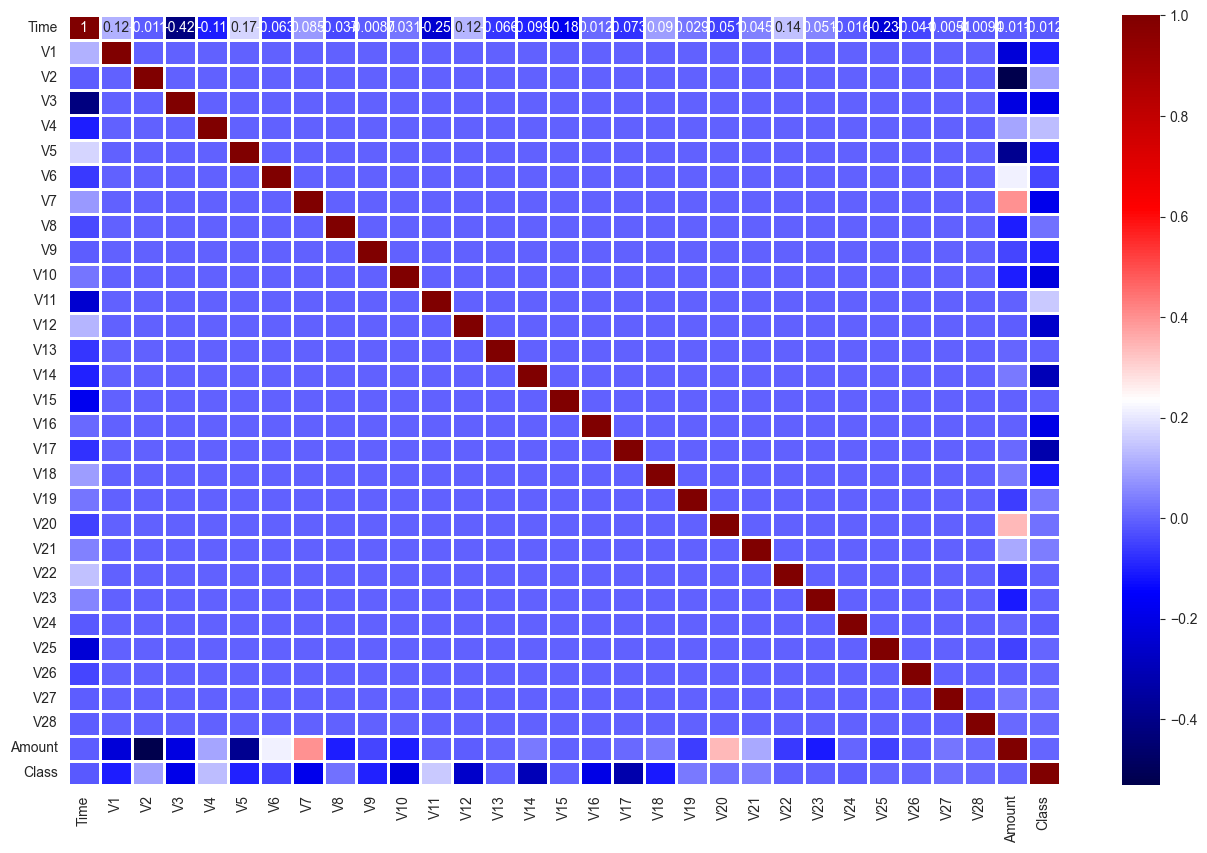

In [24]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(),  cmap="seismic", annot=True, linewidths=2)
sns.set_style('white')

plt.show()

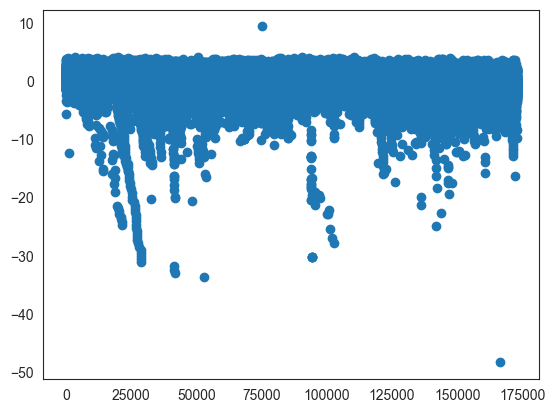

In [25]:
plt.scatter(x=data['Time'], y=data['V3'])
plt.show()

C:\Users\Tk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


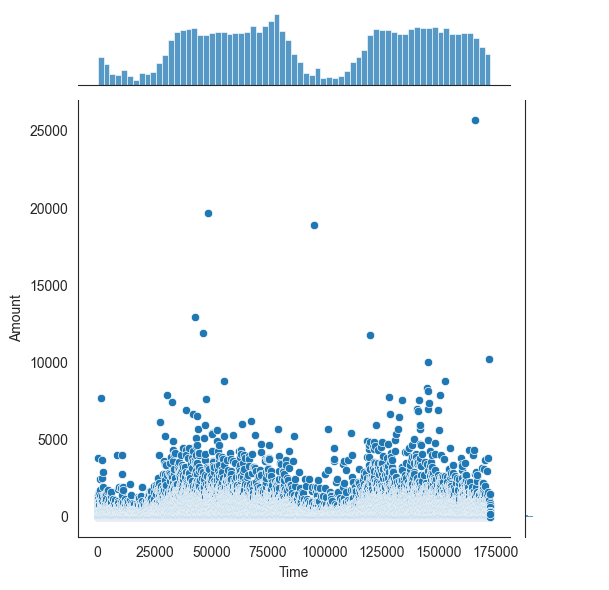

In [26]:
sns.jointplot(x=data['Time'], y=data['Amount'])
plt.show()

## 2. Data Pre-Processing Phase
The most important aspects of the pre-processing phase are the cleaning and data normalization steps. 
Data cleaning is crucial because it ensures that the quality of the data used to build the models has been improved. 
The steps taken to clean the data include: removing duplicates, replacing missing data, fixing structural errors, and removing unwanted (potentially noisy) observations.

For data normalization purpose,the *Min-Max scaling* is applied, and it's defined as follows:



$ X_norm = (p -q) \frac{{x_n} - min(x_n)} {max(x_n) - min(x_n)} $

where $x$ represent a given feature in the feature space, $X$

And after pre-processing phase, I will split the datasets $D_{labeled}$ into the training $D_{Training}$, validation $D_{Validation}$, and testing $D_{Testing}$ datasets


In [27]:
X = data.drop('Class', axis=1)
y = data.Class
print(f'{X.shape}{y.shape}')

(284807, 30)(284807,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

print(f'{X_train.shape }  {X_val.shape} {y_train.shape }')

(139554, 30)  (59810, 30) (139554,)


#### This scaling process acts as a safeguarding process by squeezing the values of each feature within a certain range

In [29]:
scalar = MinMaxScaler()

In [30]:
X_train = scalar.fit_transform(X_train)
X_val = scalar.fit_transform(X_val)
X_test = scalar.fit_transform(X_test)

In [31]:
w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulent transaction weight: {w_n}")
print(f"Non-Fraudulent transaction weight: {w_p}")

Fraudulent transaction weight: 0.0018487467216991272
Non-Fraudulent transaction weight: 0.9981512532783009


In [32]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_val.shape}, y_validate: {y_val.shape}\n{'_'*55}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (139554, 30), y_train: (139554,)
_______________________________________________________
VALIDATION: X_validate: (59810, 30), y_validate: (59810,)
_______________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


C:\Users\Tk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


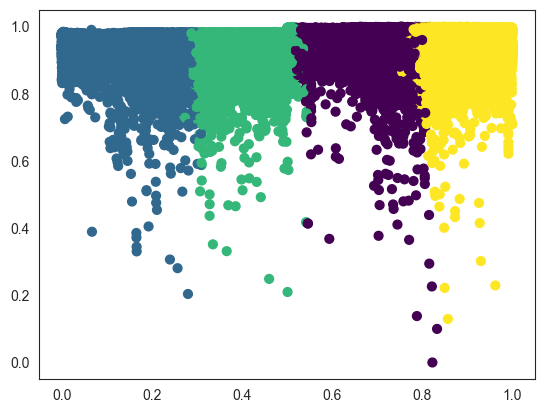

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X_train).predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, s=40, cmap='viridis');

## 3. Model validation via cross-validation

In [34]:
model = KNeighborsClassifier(n_neighbors=1)

In [35]:
model

KNeighborsClassifier(n_neighbors=1)

In [36]:
y2_model = model.fit(X_train, y_train).predict(X_test)
y1_model = model.fit(X_test, y_test).predict(X_train)
f1_score(y_train, y1_model), f1_score(y_test, y2_model)

(0.6923076923076922, 0.7272727272727272)

In [37]:
cross_val_score(model, X, y, cv=5)

array([0.00696956, 0.22929321, 0.49277576, 0.38563227, 0.99827952])

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

## 3. Feature Selection Phase using Genetic Algorithm
Feature selection and instance selection primarily aims to achieve two goals: (a) reduce computational complexity by using fewer features, and
instances, for model training; (b) improve generalization performance and model accuracy by reducing overfitting.

And GA will be used for feature selection. Genetic Algorithms aim to replicate the behavior of genetic evolution, whereby the genetics of the individuals best suited to the environment persist over time.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from deap import base, creator, tools, algorithms


## Define the fitness function
def evalRF(individual):
    # # Convert individual to a dictionary of hyperparameters
    n_estimators = int(individual[0])
    max_depth = None if individual[1] == 0 else int(individual[1])
    min_samples_split = int(individual[2])
    
    # # Create and evaluate a Random Forest classifier with the given hyperparameters
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    scores = cross_val_score(clf, X, y, cv=5)
    return (np.mean(scores),)

## Set up the genetic algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", np.random.randint, 10, 100)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalRF)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=10, up=100, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

## Initialize the population
population = toolbox.population(n=50)

## Run the genetic algorithm
result = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

## Extract the best individual
best_ind = tools.selBest(population, 1)[0]
print(f'Best Individual: {best_ind}, Fitness: {best_ind.fitness.values[0]}')


## 4. Modelling and Evaluation


### 5.1 Neural Network

In [49]:
X_train.shape[-1]

30

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

In [83]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]


model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

# callbacks = keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')
# class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
#     callbacks=[callbacks],
)

Epoch 1/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - fn: 52.7143 - fp: 35108.4297 - loss: 0.8626 - precision: 0.0019 - recall: 0.5205 - tn: 37389.6875 - tp: 73.6857 - val_fn: 79.0000 - val_fp: 7.0000 - val_loss: 0.6436 - val_precision: 0.7308 - val_recall: 0.1939 - val_tn: 59705.0000 - val_tp: 19.0000
Epoch 2/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - fn: 25.3857 - fp: 30925.0430 - loss: 0.7338 - precision: 0.0034 - recall: 0.8134 - tn: 41563.9297 - tp: 110.1571 - val_fn: 78.0000 - val_fp: 7.0000 - val_loss: 0.6056 - val_precision: 0.7407 - val_recall: 0.2041 - val_tn: 59705.0000 - val_tp: 20.0000
Epoch 3/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - fn: 23.1286 - fp: 26594.7578 - loss: 0.6644 - precision: 0.0040 - recall: 0.8085 - tn: 45893.8867 - tp: 112.7429 - val_fn: 68.0000 - val_fp: 10.0000 - val_loss: 0.5464 - val_precision: 0.7500 - val_recall: 0.3061 - val_tn: 59702.0000 - val_tp: 30.0000
Epoch 4/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - fn: 17.7714 - fp: 22532.5723 

In [84]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - fn: 23.1770 - fp: 7.6875 - loss: 0.0072 - precision: 0.8644 - recall: 0.6456 - tn: 42689.8750 - tp: 47.2272
[0.005704501643776894, 39.0, 15.0, 0.8660714030265808, 0.7132353186607361, 85292.0, 97.0]


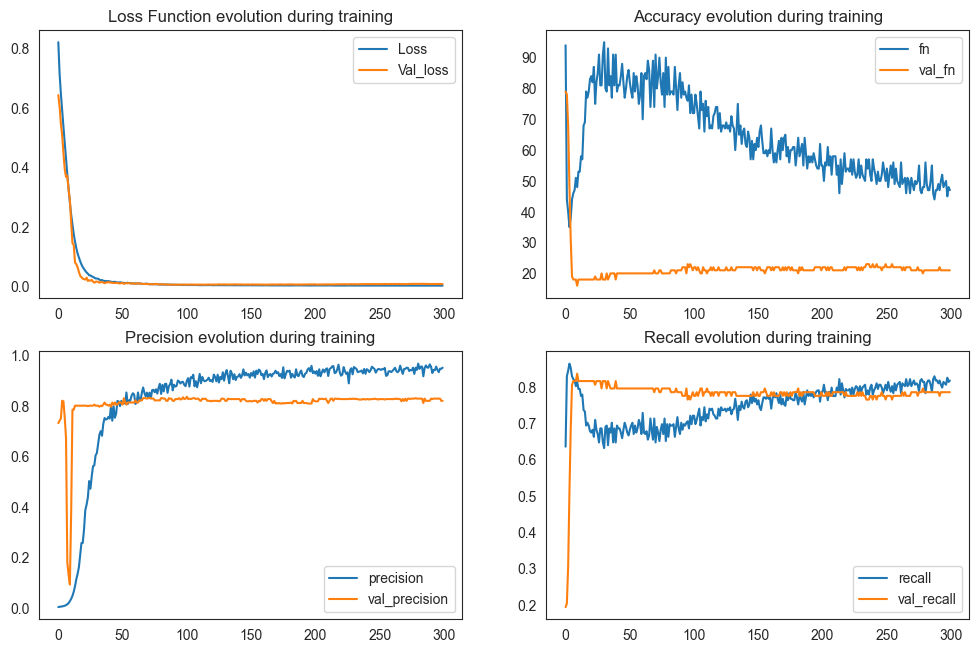

In [85]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_loss')
plt.title('Loss Function evolution during training')
plt.legend()



plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [86]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

4362/4362 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Train Result:
Accuracy Score: 99.97%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999742    0.986667  0.999721       0.993204       0.999717
recall          0.999978    0.860465  0.999721       0.930222       0.999721
f1-score        0.999860    0.919255  0.999721       0.959557       0.999711
support    139296.000000  258.000000  0.999721  139554.000000  139554.000000
_______________________________________________
Confusion Matrix: 
 [[139293      3]
 [    36    222]]

Test Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999543    0.866071  0.999368      0.932807      0.999331
recall         0.999824    0.713235  0.999368      0.856530  

## Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=10, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999871    0.995851  0.999864       0.997861       0.999863
recall          0.999993    0.930233  0.999864       0.965113       0.999864
f1-score        0.999932    0.961924  0.999864       0.980928       0.999862
support    139296.000000  258.000000  0.999864  139554.000000  139554.000000
_______________________________________________
Confusion Matrix: 
 [[139295      1]
 [    18    240]]
Test Result:
Accuracy Score: 99.92%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999648    0.741259  0.999216      0.870454      0.999237
recall         0.999566    0.779412  0.999216      0.889489      0.999216
f1-score       0.999607    0.759857  0.999216      0.879732      0.999226
s

In [122]:
scores_df = pd.DataFrame(scores_dict)

In [123]:
scores_dict

{'ANNs': {'Train': 0.9192546583850931, 'Test': 0.7822580645161291},
 'Random Forest': {'Train': 0.9619238476953909, 'Test': 0.7598566308243728}}

<Axes: >

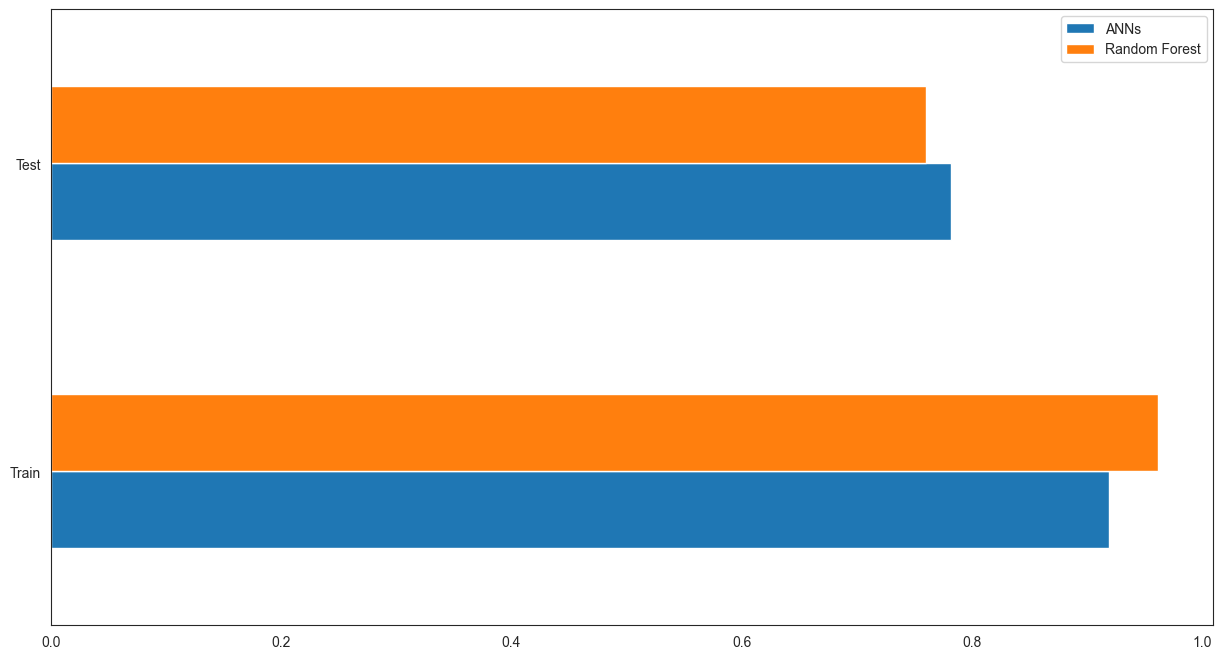

In [124]:
scores_df.plot(kind='barh', figsize=(15, 8))